# <center> Projet 3 : Concevez une application au service de la santé publique

Notebook cleaning

L'objectif de ce projet est de participer à un appel à projets de l'agence "Santé publique France" et proposer une idée innovante d’application en lien avec l'alimentation.

# 1. Application : Nutri_Protéine

Les protéines sont indispensables à la croissance de l’enfant et au bon fonctionnement de son organisme. L’apport quotidien en protéines doit être de 0,8 à 0,9 g par kilo.

Ces besoins sont facilement couverts. En effet, dans les sociétés occidentales, la quantité moyenne de protéines ingérées par un enfant est, en général, trois à cinq fois supérieure à ses besoins. Cet apport excessif en protéines pourrait avoir des conséquences encore mal évaluées, comme une obésité ou des problèmes rénaux.

Nutri_Protéine est une application pour manger "équilibré" qui consiste à calculer l'apport quaotidien des aliments riches en protéines et calcium de l'alimentation de nos enfants. Il suffit de scanner le code barres de nos courses (ou d'ajouter manuellement la nature et la quantité des produits sans code barres : acheté chez le boucher, boulanger...) et l'application décrypte pour nous l'apport protéine et attribue également une note à travers un code couleur (rouge si l'apport est trop élevé, orange si l'apport est faible et verte si l'apport est moyen).

# 2. Importation des modules et données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv("C:\\Users\Marwa\Downloads\projet3\openfoodfacts.csv", delimiter='\t', encoding='utf-8', low_memory=False)

In [8]:
nb_rows, nb_columns = dataset.shape
print("Dataset a {} lignes et {} colonnes".format(nb_rows,nb_columns))

Dataset a 320772 lignes et 162 colonnes


In [9]:
#display maximum columns
pd.set_option('display.max_columns', 500)
dataset.sample(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
86538,0074401960416,http://world-fr.openfoodfacts.org/produit/0074...,usda-ndb-import,1489061824,2017-03-09T12:17:04Z,1489061824,2017-03-09T12:17:04Z,"Organic Jasmati, Long Grain American Jasmine Rice",NaN,NaN,NaN,NaN,Rice Select,rice-select,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic jasmati rice.,NaN,NaN,NaN,NaN,NaN,45 g (0.25 cup),NaN,0.0,[ organic-jasmati-rice -> en:organic-jasmati-...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1393.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.67,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181240,20713157,http://world-fr.openfoodfacts.org/produit/2071...,openfoodfacts-contributors,1485523739,2017-01-27T13:28:59Z,1485523885,2017-01-27T13:31:25Z,Salade to go,NaN,180g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,N

# 3. Nettoyage des données

## 3.1 Remplissage total

In [10]:
#number of non-Nan data in the dataset
data = dataset.count().sum()
data

12356475

In [12]:
#computing the filling rate
filling_rate = data / (nb_rows * nb_columns)
print("The total filling rate of the Dataset is : {:.2%}".format(filling_rate))

The total filling rate of the Dataset is : 23.78%


In [4]:
#missing data
nrows, ncols = dataset.shape
percent_missing = dataset.isnull().sum().sum() / (nrows*ncols)
print(f"The percent missing of the dataset is {percent_missing*100}%")

The percent missing of the dataset is 76.22157263195135%


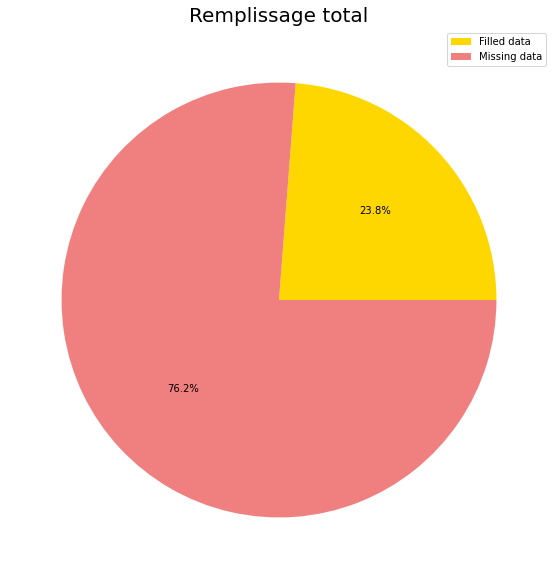

In [13]:
#Plotting pie chart
labels = ["Filled data", "Missing data"]
frequencies = [filling_rate, 1 - filling_rate]
colors = ['gold', 'lightcoral']
fig, axe = plt.subplots(figsize=(10, 10))
plt.title("Remplissage total", fontsize=20)
axe.pie(frequencies, autopct='%1.1f%%', colors=colors)
plt.legend(labels)
plt.show()

## 3.2 Remplissage par colonne 

In [14]:
data_stat=pd.DataFrame(index=['missing data', 'missing rate', 'filled data','filling rate'], columns=dataset.columns )
for column in dataset.columns:
    nb_nan=dataset[column].isnull().sum()
    data_stat.loc['missing data',column]=nb_nan           
    data_stat.loc['filled data', column]= dataset.shape[0]-nb_nan
    data_stat.loc['filling rate', column]=(dataset.shape[0]-nb_nan)/(dataset.shape[0]*1.0)
    data_stat.loc['missing rate', column]= nb_nan/(dataset.shape[0]*1.0)
display(data_stat)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
missing data,23,23,2,3,9,0,0,17762,267977,215953,241812,241811,28412,28420,236362,236383,236361,298582,298619,284271,284277,274213,274128,274106,291466,291469,301969,320749,300452,262579,269050,280,280,280,71810,292428,320753,296419,296443,296420,109441,320772,71833,71867,166092,166092,71833,320772,315937,71833,320772,309076,320772,99562,229259,226281,46,46,46,236406,236406,244936,244936,59659,319915,76881,91218,320772,320772,320771,320770,320768,320771,320771,320771,320748,320749,320772,320772,320771,320772,297949,297913,319931,320586,320734,320694,320584,320623,320764,320748,320749,320751,320759,320772,320758,320772,320772,320772,177474,176682,77184,75801,320700,320746,320734,320510,320768,320761,320506,320358,119886,60850,320745,320756,320763,65262,65309,316639,183218,320738,313715,319432,319854,179905,309618,309957,309043,313988,315532,317730,315472,320442,318289,320734,320691,296024,320614,179722,314927,180310,314519,316843,318666,319152,320693,319604,320752,320761,320513,320694,320743,320723,317736,320607,319824,320772,320504,99562,99562,320772,320772
missing rate,0.000072,0.000072,0.000006,0.000009,0.000028,0.0,0.0,0.055373,0.835413,0.673229,0.753844,0.753841,0.088574,0.088599,0.736854,0.736919,0.73685,0.930823,0.930938,0.886209,0.886228,0.854853,0.854588,0.85452,0.908639,0.908649,0.941382,0.999928,0.936653,0.818585,0.838758,0.000873,0.000873,0.000873,0.223866

<ipython-input-15-47d4f767f6fe>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels = [0, 20, 40,60,80,100], rotation=45, size=12)


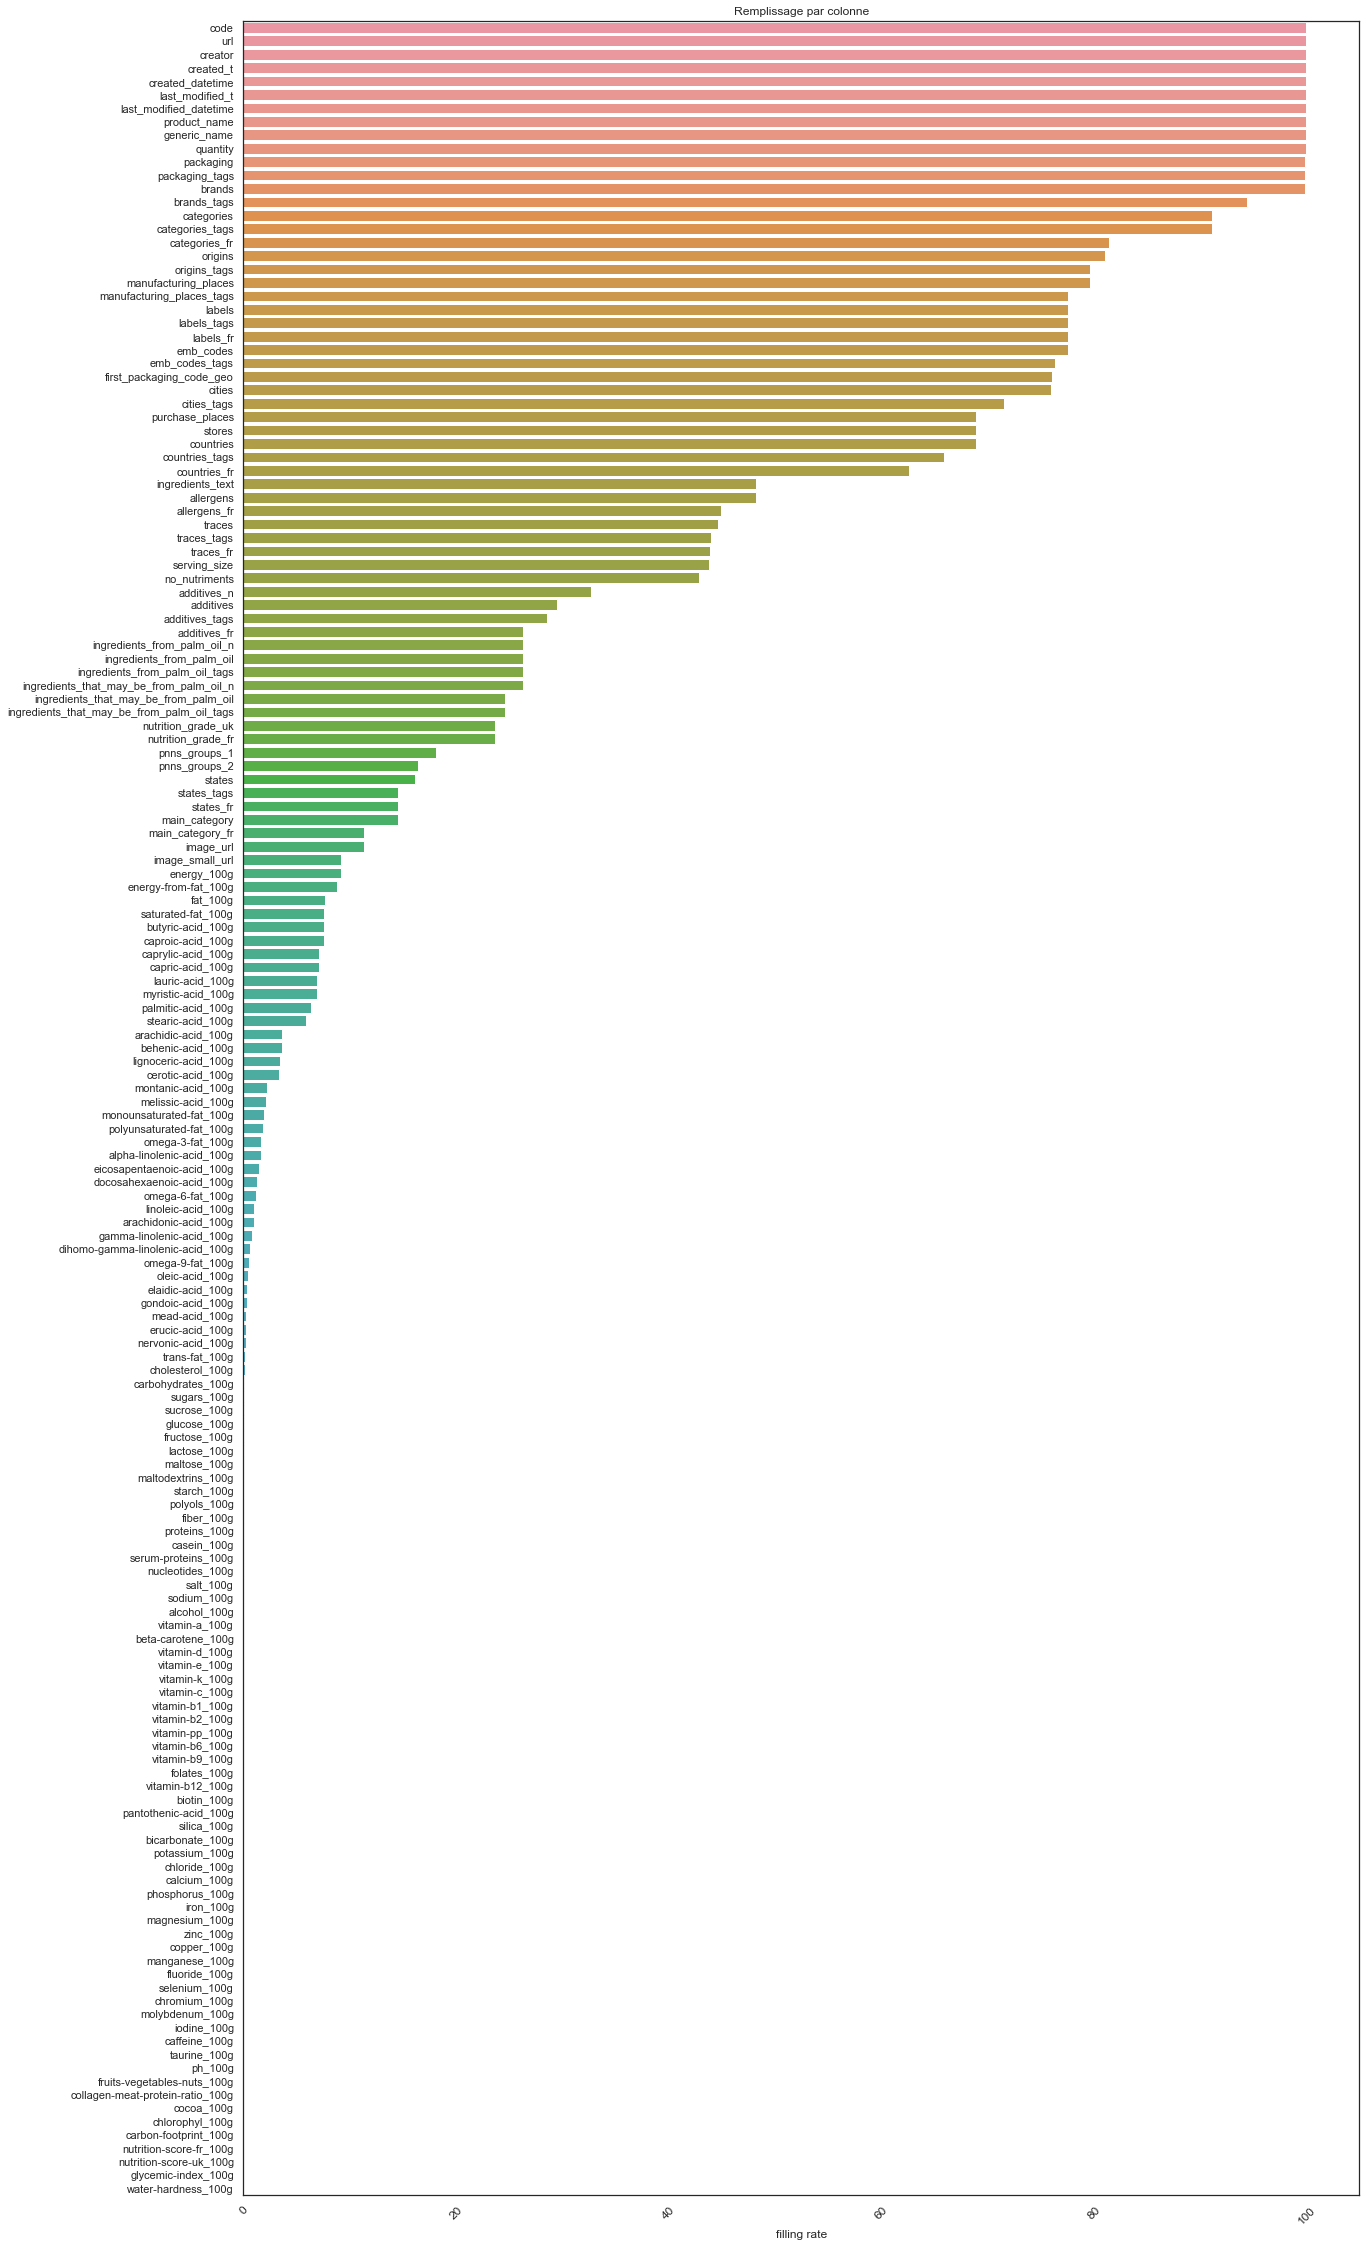

In [15]:
#plotting filling rate per column
sns.set(style="white")
plt.figure(figsize=(20,40))
data=data_stat.loc['filling rate'].sort_values( ascending=False)
plot=sns.barplot(y = dataset.columns, x = data)
plt.title('Remplissage par colonne')
plot.set_xticklabels(labels = [0, 20, 40,60,80,100], rotation=45, size=12)
#plot.set_xticklabels(labels = taux_null['value'], rotation=45, size=12)
plt.show()

## 3.3 Suppression des colonnes vides  

In [10]:
#empty columns
colonnes_vides=[]
for column in dataset.columns:
    if dataset[column].isnull().all():
        colonnes_vides.append(column)
print ('empty columns are :\n\n')
display(colonnes_vides)

empty columns are :




['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

In [3]:
# Droping empty columns
colonnes_vides=['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

data_cleaned=dataset.drop(columns=colonnes_vides, axis=1, inplace=True)

## 3.4  Suppression des colonnes non-pertinentes

Selon le fichier data_description (lien : https://world.openfoodfacts.org/data/data-fields.txt), il y a 5 sections.

- Les informations générales: "general informations" 
- Un ensemble de tags: "tags"
- Les ingrédients: "ingredients"
- Des informations differentes: "misc. data"
- Des informations nutritionnelles: "nutrition facts"

Il y a pas mal des colonnes inutiles qui ne servent à rien pour notre analyse.

In [4]:
# Drop columns
colonnes_inutiles=['url', 
                   'creator', 
                   'created_t', 
                   'created_datetime',
                   'last_modified_t', 
                   'last_modified_datetime',
                   'states',
                   'states_tags',
                   'states_fr',
                   'image_url',
                   'image_small_url'
                   ]
data_cleaned=dataset.drop(columns=colonnes_inutiles, axis=1, inplace=True)

## 3.5 Seuil de remplissage 

Nous éliminons les colonnes dont le taux de remplissage est inférieur à un seuil.

In [5]:
#seuil de remplissage (méthode), on utilisera 90%
dat=dataset.isnull().mean().describe(percentiles=(.4, 0.5, 0.6,.7), include='all')
print(dat)

#sum isnull
na=(dataset.isnull().mean()>0.90).sum()
print('Nombre des colonnes avec taux de remplissage est moins de 10% est :', na)

#drop column si taux de nan>90%
coll_null_rate = dataset.isnull().mean()
threshold_drop = 0.90 
drop_cols = coll_null_rate[coll_null_rate>0.90].index
dataset.drop(columns=drop_cols, axis=1, inplace=True)

count    135.000000
mean       0.784824
std        0.311816
min        0.000072
40%        0.918364
50%        0.966284
60%        0.994041
70%        0.999370
max        0.999997
dtype: float64
Nombre des colonnes avec taux de remplissage est moins de 10% est : 84


## 3.6 Suppression des lignes sans nom de produit

In [6]:
# Drop rows with no product name
data_cleaned = dataset.dropna(subset=['product_name'])
print("Forme:", data_cleaned.shape)

Forme: (303010, 51)


## 3.7 Données dupliquées 

### 3.7.1  Colonnes dupliquées

In [7]:
def search_redundant_col(df):
  redundant_columns = []
  for col in df.columns:
    if "_en" in col:
      en = col.replace('_en','')
     
      if en in df.columns : 
        redundant_columns.append(en)    

    if '_tags' in col:
      tags_2 = col.replace('_tags','')
      
      if tags_2 in df.columns :
        redundant_columns.append(col)
    if '_fr' in col:
      fr_2 = col.replace('_tags','')
      if fr_2 in df.columns :
        redundant_columns.append(col)

  return redundant_columns, pd.DataFrame(redundant_columns).shape[0]

#duplicated columns 
duplicated_columns, number= search_redundant_col(dataset)
print("Nombre colonnes dupliquées {} ".format(number))

Nombre colonnes dupliquées 15 


In [54]:
duplicated_columns

['packaging_tags',
 'brands_tags',
 'categories_tags',
 'categories_fr',
 'manufacturing_places_tags',
 'labels_tags',
 'labels_fr',
 'countries_tags',
 'countries_fr',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'main_category_fr']

In [8]:
#drop duplicated columns
colonnes_dupliquées=['packaging_tags',
 'categories_tags',
 'manufacturing_places_tags',
 'labels_tags',
 'countries_tags',
 'additives_tags',
 'ingredients_from_palm_oil_n',
 'brands_tags',
 'categories_fr',
 'labels_fr',
 'countries_fr',
 'additives_fr',
 'ingredients_that_may_be_from_palm_oil_n',
 'main_category_fr']

dataset=data_cleaned.copy()
dataset=data_cleaned.drop(columns=colonnes_dupliquées, axis=1, inplace=True)

In [158]:
data_cleaned.shape

(303010, 36)

### 3.7.2 Lignes dupliquées

In [9]:
def duplicates_rows(dataframe, subset):
    return dataframe.duplicated(subset, keep=False).sum()

duplicates_rows(data_cleaned, ["product_name"])

106095

In [10]:
#show unique values
data_cleaned["product_name"].nunique() / len(data_cleaned)

0.7304940431008877

On voit ici que seulement 73% des valeurs de la colonne product_name sont unique et donc que 27% sont des doublons. On va essayer de voir pourquoi les valeurs sont dupliquées, commençons par voir les product_name qui apparaissent le plus de fois.

In [11]:
data_cleaned["product_name"].value_counts()

Ice Cream                                                 410
Extra Virgin Olive Oil                                    303
Potato Chips                                              281
Premium Ice Cream                                         226
Tomato Ketchup                                            182
                                                         ... 
Classique Nature & Oignons                                  1
Natural Butter Flavor                                       1
Easter Choco Chicks                                         1
Hazelnut Butter Blend Chocolate Squeeze                     1
Cookies & Cream Artificial Flavor Added, Frozen Yogurt      1
Name: product_name, Length: 221347, dtype: int64

On voit ici qu'il y a 182 occurences de Ketchup. A ce niveau là tant que pour chaque Ketchup on a un nutri score cela ne pose aucun problème d'avoir des doublons.

Faisons un focus sur le Ketchup en vérifiant si chaque Ketchup a un code barre différent.

In [12]:
df_ketchup = data_cleaned[data_cleaned["product_name"] == 'Tomato Ketchup']

In [13]:
df_ketchup["code"].nunique() / len(df_ketchup)

1.0

Il y a bien un unique code par ketchup donc pas vraiment de doublons

Essayons de voir en quoi les ketchup differents

In [14]:
df_ketchup["nutrition-score-fr_100g"].value_counts()

16.0    75
13.0    15
14.0    13
15.0     9
12.0     4
11.0     3
17.0     3
10.0     2
Name: nutrition-score-fr_100g, dtype: int64

In [15]:
vars_nutriscore = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g', "nutrition-score-fr_100g"]

df_ketchup[vars_nutriscore].describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,178.000000,174.000000,124.000000,82.0,85.0,174.000000,177.000000,102.000000,178.000000,177.000000,177.000000,117.000000,112.000000,79.0,79.000000,124.000000
mean,484.258427,0.047057,0.025065,0.0,0.0,26.989943,23.252316,0.219608,0.454270,2.341885,0.922016,0.000216,0.006458,0.0,0.000081,15.032258
std,190.719336,0.137282,0.072035,0.0,0.0,8.908754,8.670125,0.495932,1.654392,0.320183,0.126099,0.000143,0.003362,0.0,0.000408,1.545702
min,290.000000,0.000000,0.000000,0.0,0.0,15.000000,11.760000,0.000000,0.000000,0.010600,0.004170,0.000000,0.000000,0.0,0.000000,10.000000
25%,438.500000,0.000000,0.000000,0.0,0.0,23.530000,23.000000,0.000000,0.000000,2.390140,0.941000,0.000176,0.007100,0.0,0.000000,14.000000
50%,494.000000,0.000000,0.000000,0.0,0.0,26.585000,23.530000,0.000000,0.000000,2.390140,0.941000,0.000176,0.007100,0.0,0.000000,16.000000
75%,494.000000,0.000000,0.000000,0.0,0.0,29.410000,23.530000,0.000000,0.600000,2.390140,0.941000,0.000176,0.007100,0.0,0.000000,16.000000
max,2510.000000,1.000000,0.588000,0.0,0.0,136.000000,134.000000,2.300000,20.000000,3.500000,1.380000,0.000530,0.021200,0.0,0.002120,17.000000


In [16]:
df_ketchup[vars_nutriscore].duplicated().mean()

0.6208791208791209

Effectivement 62% de doublons dans les ketchup sur une bonne partie des variables pouvant infuencer le nutriscore.

In [17]:
duplicated_rows = data_cleaned[vars_nutriscore].duplicated()
duplicated_rows.mean()

0.37056862809808255

40% environ de doublons sur les variables nutriscore au global dans le dataset. Il faut donc dropper ces lignes

In [18]:
_ = len(data_cleaned)
data_cleaned = data_cleaned.drop(data_cleaned[duplicated_rows].index)
print(f"dropped {(len(data_cleaned)/_)}% of rows")

dropped 0.6294313719019174% of rows


In [19]:
data_cleaned.shape

(190724, 37)

## 3.8 Identifications des valeurs aberrantes 

In [20]:
#types des données 
numériques = data_cleaned.select_dtypes(include=["float64","int64"]).columns
catégorielles = data_cleaned.select_dtypes(exclude=["float64","int64"]).columns
print(numériques.shape)
print(catégorielles.shape)
print(data_cleaned.shape) 

(18,)
(19,)
(190724, 37)


Il semble que nous ayons un mélange de colonnes numériques et de colonnes avec des données textuelles dans cette base de données on a 18 colonnes de type numérique et 19 colonnes de type catégorie.

In [21]:
#On peut identifier les outliers par la méthode (z-score)
#data= dataset[données_numériques]
données_numériques=list(data_cleaned.select_dtypes(include=["float64","int64"]).columns)

#median= data.median()
for data in data_cleaned[données_numériques]:
   #dataset[data]=dataset[data].sort_values(ascending=False) 
   mean = np.mean(data_cleaned[data])
   std=   np.std(data_cleaned[data])
# create empty list to store outliers

   outliers = []
   for i in data_cleaned[data]: 
    
       z = (i-mean)/std # calculate z-score
       upper = mean + 3*std
       lower= mean - 3*std
       if abs(z) > upper:  # identify outliers
           outliers.append(i)
           #dataset[data]=dataset[data].replace(i, np.nan)
        
       if abs(z)<lower:    # identify outliers
           outliers.append(i)
           #dataset[data]=dataset[data].replace(i, np.nan)
        
#print outliers   
   print( data) 
   print("The detected  outliers are: ", outliers)

additives_n
The detected  outliers are:  [28.0, 28.0, 27.0, 29.0, 29.0, 31.0, 27.0, 31.0, 31.0]
energy_100g
The detected  outliers are:  []
fat_100g
The detected  outliers are:  []
saturated-fat_100g
The detected  outliers are:  [550.0]
trans-fat_100g
The detected  outliers are:  [15.0, 10.61, 12.12, 14.29, 18.18, 11.63, 16.28, 19.23, 11.11, 21.43, 19.23, 17.86, 10.71, 13.79, 12.07, 13.64, 13.64, 20.0, 20.0, 20.0, 20.0, 16.0, 16.0, 100.0, 12.5, 12.5, 12.5, 12.5, 369.0, 13.33, 15.0, 14.0, 14.06, 15.62, 14.06, 10.61, 15.15, 13.64, 13.95, 14.06, 14.06, 14.06, 14.06, 15.15, 15.15, 14.06, 14.06, 10.71, 10.71, 10.61, 10.71, 21.43, 12.12, 12.12, 12.12, 15.15, 15.0, 14.29, 40.0, 10.71, 10.71, 10.71, 10.71, 21.43, 12.07, 12.07, 12.5, 16.07, 28.0, 38.46, 12.12, 12.12, 13.64, 15.15, 18.18, 17.86, 19.23, 17.86, 14.29, 83.0, 15.15, 17.86, 13.33, 15.0, 10.71, 28.57, 10.87, 20.69, 13.95, 30.3, 13.64, 13.64, 13.64, 28.0, 28.0, 10.61, 10.71, 21.43, 45.0, 17.86, 17.86, 15.79, 11.11, 10.71, 10.71, 83.0, 

C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Marwa\anaconda3\lib\si

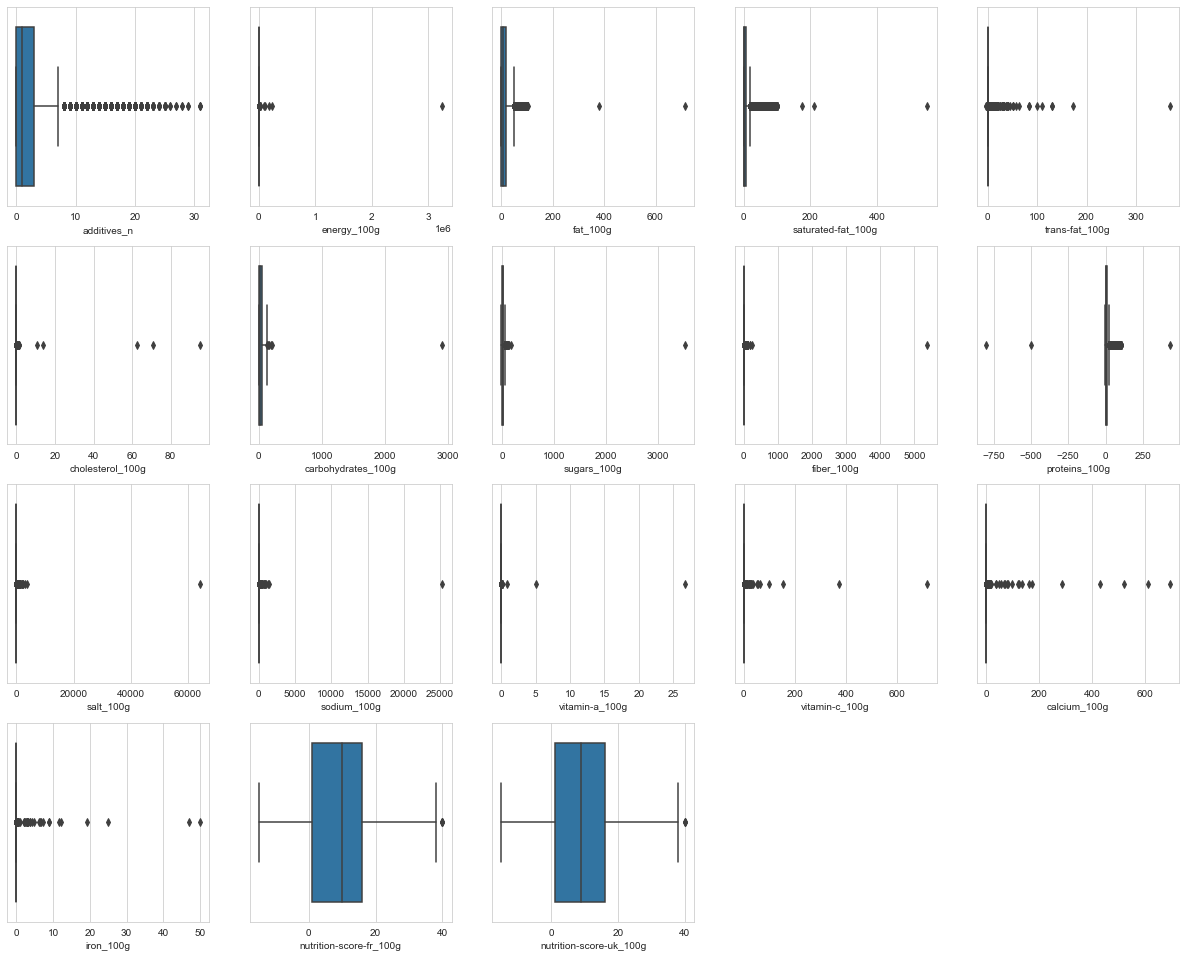

In [22]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

for i in range (data_cleaned[données_numériques].shape[1]):
    fig.add_subplot(7,5, i+1)
    #fig, ax = plt.subplots()
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    colonne= données_numériques[i]
    sns.boxplot(data_cleaned[colonne])
    #sns.set_title("identifier les outliers de : {}".format(colonne))
plt.show()

On a constaté que les variables suffixé par _100g indique la quantité de nutriment pour 100g de produit correspond. Ces variables ne peuvent pas depasser 100.

In [23]:
#nombre des outliers aberantes pour chaque produit 
(data_cleaned[vars_nutriscore]>100).sum()

energy_100g                181144
fat_100g                        4
saturated-fat_100g              3
trans-fat_100g                  5
cholesterol_100g                0
carbohydrates_100g             16
sugars_100g                     9
fiber_100g                      4
proteins_100g                   1
salt_100g                      91
sodium_100g                    29
vitamin-a_100g                  0
vitamin-c_100g                  3
calcium_100g                   10
iron_100g                       0
nutrition-score-fr_100g         0
dtype: int64

In [24]:
#drop outliers aberantes pour les variables suffixé par _100g
for data in data_cleaned[vars_nutriscore]:
   outlier=[]
   for i in data_cleaned[data]: 
    
       if (float(i) > 100) | (float(i)<0):  # identify outliers
          outlier.append(i)
          data_cleaned[data]=data_cleaned[data].replace(i, np.nan)
   print( data) 
   print("The detected  outliers are: ", outlier)

energy_100g
The detected  outliers are:  [2243.0, 1941.0, 2540.0, 1552.0, 1933.0, 1490.0, 1833.0, 2406.0, 3586.0, 1393.0, 1540.0, 2230.0, 2590.0, 2536.0, 1824.0, 2632.0, 2092.0, 1582.0, 1096.0, 1464.0, 1674.0, 2372.0, 1954.0, 1548.0, 1887.0, 1569.0, 2761.0, 1515.0, 1335.0, 2197.0, 1749.0, 2046.0, 1513.0, 699.0, 1477.0, 1272.0, 2054.0, 1904.0, 1523.0, 1720.0, 1611.0, 1443.0, 1297.0, 1536.0, 1891.0, 1356.0, 1644.0, 2389.0, 2648.0, 2439.0, 2690.0, 2766.0, 2176.0, 2678.0, 2218.0, 1812.0, 2946.0, 2791.0, 2510.0, 234.0, 1289.0, 1314.0, 1255.0, 1883.0, 941.0, 1427.0, 1197.0, 1506.0, 1423.0, 837.0, 1661.0, 1527.0, 1778.0, 1184.0, 1481.0, 1452.0, 1046.0, 2179.0, 1218.0, 1360.0, 2377.0, 2402.0, 159.0, 1210.0, 1520.0, 1329.0, 1090.0, 1160.0, 478.0, 751.0, 1753.0, 1159.0, 1339.0, 1920.0, 2067.0, 1866.0, 1155.0, 1623.0, 1665.0, 1632.0, 1176.0, 2257.0, 2117.0, 2912.0, 1284.0, 177.0, 1640.0, 180.0, 1079.0, 144.0, 2278.0, 320.0, 1900.0, 1117.0, 954.0, 2330.0, 2130.0, 2013.0, 983.0, 1533.0, 1494.0, 107

In [25]:
#Enregistrer data_cleaned comme fichier csv
data_cleaned.to_csv("C:\\Users\Marwa\Downloads\projet3\data_cleaned.csv")

# 4. Imputation des données manquantes

## 4.1 Imputation des données numériques

In [128]:
#statistique sur le nombre des valeurs null pour chaque variable 
data_cleaned[numériques].isnull().sum().sort_values(ascending=False)

energy_100g                182084
vitamin-a_100g              95212
trans-fat_100g              93404
vitamin-c_100g              92966
iron_100g                   92810
calcium_100g                92250
cholesterol_100g            91965
nutrition-score-fr_100g     49068
fiber_100g                  39615
additives_n                 23551
nutrition-score-uk_100g     22997
saturated-fat_100g          17768
fat_100g                    17421
carbohydrates_100g          17396
sugars_100g                 10077
salt_100g                    5697
sodium_100g                  5661
proteins_100g                1998
dtype: int64

### 4.1.1 Imputation par zéro 

In [129]:
# replace missing values with zero
dataset_zero_imputed = data_cleaned[numériques].fillna(0)
dataset_zero_imputed

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0.0,0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000000,0.0,0.0000,0.000,0.00000,0.0,0.0
1,0.0,0.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0.0,0.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0.0,0.0,57.14,5.36,0.0,0.000,17.86,3.57,7.1,17.86,1.22428,0.482000,0.0,0.0000,0.143,0.00514,12.0,12.0
4,0.0,0.0,1.43,0.00,0.0,0.000,77.14,0.00,5.7,8.57,0.00000,0.000000,0.0,0.0000,0.000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320741,0.0,4.0,0.00,1.00,0.0,0.000,0.00,1.00,10.0,10.00,10.00000,3.937008,0.0,0.0000,0.000,0.00000,0.0,0.0
320742,0.0,0.0,0.00,0.00,0.0,0.000,87.06,2.35,4.7,1.18,0.03048,0.012000,0.0,0.0000,0.000,0.00127,0.0,-1.0
320751,0.0,0.0,2.80,0.60,0.0,0.000,74.80,2.60,5.9,13.00,0.68000,0.267717,0.0,0.0000,0.000,0.00380,0.0,-4.0
320756,0.0,0.0,31.00,0.00,0.0,0.000,12.20,9.60,1.1,2.10,1.10000,0.433071,0.0,0.0000,0.000,0.00000,0.0,0.0


### 4.1.2 Imputation par KNN

In [130]:
from sklearn.impute import KNNImputer
dataset_KNN_imputed= data_cleaned[numériques]
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(data_cleaned[numériques])
dataset_KNN_imputed = imputer.transform(dataset_KNN_imputed)
dataset_KNN_imputed=pd.DataFrame(dataset_KNN_imputed, columns=numériques)
dataset_KNN_imputed

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,2.015152,43.926991,12.580346,5.0383,0.08091,0.020624,31.948369,15.296345,2.882573,7.289053,1.517302,0.613559,0.000500,0.016458,0.095897,0.004398,11.506763,9.069619
1,0.000000,17.200000,28.570000,28.5700,0.00000,0.018000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,0.000000,0.021400,0.000000,0.001290,14.000000,14.000000
2,0.000000,17.200000,17.860000,0.0000,0.00000,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,0.000000,0.000000,0.071000,0.001290,0.000000,0.000000
3,0.000000,17.200000,57.140000,5.3600,0.00000,0.000000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000,0.000886,0.005400,0.143000,0.005140,12.000000,12.000000
4,0.000000,17.200000,1.430000,0.7700,0.00000,0.001200,77.140000,10.548000,5.700000,8.570000,0.044892,7.075237,0.000886,0.005400,0.028299,0.006402,9.600000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190719,1.400000,4.000000,14.080000,1.0000,0.00000,0.000000,33.280000,1.000000,10.000000,10.000000,10.000000,3.937008,0.000388,0.187420,0.193340,0.005976,0.000000,0.000000
190720,0.000000,17.200000,0.000000,0.0000,0.00000,0.000000,87.060000,2.350000,4.700000,1.180000,0.030480,0.012000,0.000000,0.000000,0.000000,0.001270,0.000000,-1.000000
190721,0.000000,14.180000,2.800000,0.6000,0.00000,0.000000,74.800000,2.600000,5.900000,13.000000,0.680000,0.267717,0.013087,1.829100,0.323800,0.003800,0.000000,-4.000000
190722,0.000000,17.200000,31.000000,4.5800,0.00000,0.025400,12.200000,9.600000,1.100000,2.100000,1.100000,0.433071,0.000946,0.038500,0.210100,0.013720,9.400000,5.000000


In [132]:
#Enregistrer data_cleaned comme fichier csv
dataset_KNN_imputed.to_csv("C:\\Users\Marwa\Downloads\projet3\data_cleaned_KNN.csv")

In [145]:
dataset_KNN_imputed.shape

(190724, 18)

## 4.2 Imputation des données catégorielles

Remplacer les valeurs manquantes par la valeur la plus fréquente (Mod)

In [169]:
categorical = data_cleaned.select_dtypes(exclude = "number")
dataset_mod_inputed= categorical.fillna(categorical.mode().iloc[0])
print(categorical.isnull().sum())
dataset_mod_inputed

code                        11
product_name                 0
generic_name            151828
quantity                129180
packaging               137320
brands                    2819
categories              133903
manufacturing_places    164725
labels                  156946
purchase_places         149532
stores                  153212
countries                   63
ingredients_text         23540
serving_size             46216
additives                23569
pnns_groups_1           130121
pnns_groups_2           129952
main_category           133913
dtype: int64


,code,product_name,generic_name,quantity,packaging,brands,categories,manufacturing_places,labels,purchase_places,stores,countries,ingredients_text,serving_size,additives,pnns_groups_1,pnns_groups_2,main_category
0,0000000003087,Farine de blé noir,Pâtes alimentaires au blé dur de qualité supér...,1kg,Carton,Ferme t'y R'nao,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,en:FR,Almonds.,28 g (1 oz),[ semoule-de-ble-dur-de-qualite-superieure ->...,unknown,unknown,en:groceries
1,0000000004530,Banana Chips Sweetened (Whole),Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,unknown,unknown,en:groceries
2,0000000004559,Peanuts,Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Torn & Glasser,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,unknown,unknown,en:groceries
3,0000000016087,Organic Salted Nut Mix,Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Grizzlies,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,US,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),[ organic-hazelnuts -> en:organic-hazelnuts ...,unknown,unknown,en:groceries
4,0000000016094,Organic Polenta,Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Bob's Red Mill,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,US,Organic polenta,35 g (0.25 cup),[ organic-polenta -> en:organic-polenta ] [...,unknown,unknown,en:groceries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320741,9782401029101,Fiche Brevet,Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Hatier,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,France,Almonds.,28 g (1 oz),[ semoule-de-ble-dur-de-qualite-superieure ->...,unknown,unknown,en:groceries
320742,9787461062105,Natural Cassava,Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Industria De Casabe Paul,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,US,Cassava.,85 g (85 GRM),[ cassava -> en:cassava ],unknown,unknown,en:groceries
320751,9847548283004,Tartines craquantes bio au sarrasin,Pâtes alimentaires au blé dur de qualité supér...,200 g,"Boîte,Carton,Sachet,Plastique",Le Pain des fleurs,"Biscottes au sarrasin,Biscottes",France,"Bio,Bio européen,Sans gluten,AB Agriculture Bi...",France,Carrefour,France,Almonds.,28 g (1 oz),[ semoule-de-ble-dur-de-qualite-superieure ->...,Cereals and potatoes,Bread,en:breads
320756,989898,Test NF App,Pâtes alimentaires au blé dur de qualité supér...,100gr,Carton,Carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,en:CH,"Coco, choco",28 g (1 oz),[ coco -> fr:coco ] [ choco -> fr:choco ],unknown,unknown,en:groceries


In [148]:
#Concatenation de deux dataframes aprés le remplissage des données manquantes (KNN pour données numériques et Mod pour données qualitatives)
base_de_données = pd.concat([dataset_mod_inputed,dataset_KNN_imputed ], axis=1).reindex(dataset_mod_inputed.index)
base_de_données # notre jeux de données aprés le remplissage 

,code,product_name,generic_name,quantity,packaging,brands,categories,manufacturing_places,labels,purchase_places,stores,countries,ingredients_text,serving_size,additives,pnns_groups_1,pnns_groups_2,main_category,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,Farine de blé noir,Pâtes alimentaires au blé dur de qualité supér...,1kg,Carton,Ferme t'y R'nao,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,en:FR,Almonds.,28 g (1 oz),[ semoule-de-ble-dur-de-qualite-superieure ->...,unknown,unknown,en:groceries,2.015152,43.926991,12.580346,5.0383,0.08091,0.020624,31.948369,15.296345,2.882573,7.289053,1.517302,0.613559,0.000500,0.016458,0.095897,0.004398,11.506763,9.069619
1,0000000004530,Banana Chips Sweetened (Whole),Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,unknown,unknown,en:groceries,0.000000,17.200000,28.570000,28.5700,0.00000,0.018000,64.290000,14.290000,3.600000,3.570000,0.000000,0.000000,0.000000,0.021400,0.000000,0.001290,14.000000,14.000000
2,0000000004559,Peanuts,Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Torn & Glasser,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,unknown,unknown,en:groceries,0.000000,17.200000,17.860000,0.0000,0.00000,0.000000,60.710000,17.860000,7.100000,17.860000,0.635000,0.250000,0.000000,0.000000,0.071000,0.001290,0.000000,0.000000
3,0000000016087,Organic Salted Nut Mix,Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Grizzlies,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,US,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),[ organic-hazelnuts -> en:organic-hazelnuts ...,unknown,unknown,en:groceries,0.000000,17.200000,57.140000,5.3600,0.00000,0.000000,17.860000,3.570000,7.100000,17.860000,1.224280,0.482000,0.000886,0.005400,0.143000,0.005140,12.000000,12.000000
4,0000000016094,Organic Polenta,Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Bob's Red Mill,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,US,Organic polenta,35 g (0.25 cup),[ organic-polenta -> en:organic-polenta ] [...,unknown,unknown,en:groceries,0.000000,17.200000,1.430000,0.7700,0.00000,0.001200,77.140000,10.548000,5.700000,8.570000,0.044892,7.075237,0.000886,0.005400,0.028299,0.006402,9.600000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320741,9782401029101,Fiche Brevet,Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Hatier,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,France,Almonds.,28 g (1 oz),[ semoule-de-ble-dur-de-qualite-superieure ->...,unknown,unknown,en:groceries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320742,9787461062105,Natural Cassava,Pâtes alimentaires au blé dur de qualité supér...,200 g,Carton,Industria De Casabe Paul,"Snacks sucrés,Biscuits et gâteaux,Biscuits",France,"Organic, EU Organic, fr:AB Agriculture Biologique",France,Carrefour,US,Cassava.,85 g (85 GRM),[ cassava -> en:cassava ],unknown,unknown,en:groceries,NaN,NaN,N

In [149]:
base_de_données.to_csv("C:\\Users\Marwa\Downloads\projet3\data_cleaned_imputed.csv")